# Initialization


In [0]:
from itertools import permutations
from timeit import default_timer as timer
from random import random
from math import sqrt
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Download the "Coors_140.csv" from the GitHub repository and upload it
uploaded = files.upload()

In [0]:
coors = pd.read_csv("Coors_140.csv") 
coords = coors.to_numpy()
coords = np.delete(coords, 0,1)
amount_of_coordinates = 10  # maximum 12 
Coordinates = coords[:amount_of_coordinates]

#Plotting
plt.scatter(Coordinates[0][1], Coordinates[0][2], c='r', marker='D')
plt.scatter(Coordinates[1:,1], Coordinates[1:,2])

In [0]:
# If you prefer to generate the coordinates randomly, follow this step.

nodes = 12   # maximum 12 
Coordinates = np.ones((nodes, 3))
Coordinates[0] = 1, 0.5, 0.5

for i in range(1, nodes):
  Coordinates[i] = int(i+1), random(), random()

#Plotting
plt.scatter(Coordinates[0][1], Coordinates[0][2], c='r', marker='D')
plt.scatter(Coordinates[1:,1], Coordinates[1:,2])

# Distance Matrix

In [0]:
def Distance(x1, y1, x2, y2):
    return sqrt((x1-x2)**2+(y1-y2)**2)

length = len(Coordinates)
Distance_Matrix = np.zeros((length, length))
for i in range(length):
  for j in range(length):
    Distance_Matrix[i][j] = Distance(Coordinates[i][1],  Coordinates[i][2], Coordinates[j][1], Coordinates[j][2])

# First Tour

In [0]:
def First_Tour():
  FirstTour = list(range(2, length+1))
  return FirstTour

# Current Cost

In [0]:
def FindCurrentCost(CurTour):
    CurTour = [1] + CurTour + [1]
    temporaryDis=0
    for i in range(len(CurTour)-1):    
       temporaryDis += Distance_Matrix[CurTour[i]-1,CurTour[i+1]-1]
    return temporaryDis 

# Plotting

In [0]:
def Plotting(tour, coords):
    n=len(tour)
    longitude=[]
    latitude=[]
    
    for i in range(n):
            longitude.append(coords[tour[i]-1, 1])
            latitude.append(coords[tour[i]-1, 2])
    plt.figure()    
    plt.plot([longitude[i] for i in range(n)],
              [latitude[i] for i in range(n)],'-.', color='cornflowerblue')
    plt.scatter(Coordinates[0][1], Coordinates[0][2], c = 'r', marker='D')
    plt.scatter(Coordinates[1:,1], Coordinates[1:,2])

# Brute Force


Shortest Tour: [1, 6, 9, 3, 5, 7, 10, 4, 2, 8, 1]
Shortest Tour cost: 3.246
Calculation Time: 1.9331 sec


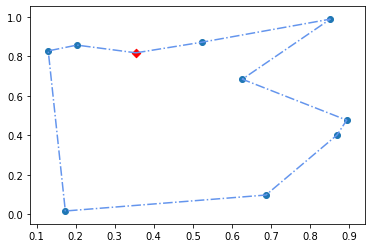

In [0]:
start = timer()

firstpossible = First_Tour()
All_Possible_Tours=list(permutations(firstpossible))

Shortest_Tour_Cost = 9999

for i in range(len(All_Possible_Tours)):
    CurrentCost=FindCurrentCost(list(All_Possible_Tours[i]))
    if CurrentCost < Shortest_Tour_Cost:
        Shortest_Tour_Cost = CurrentCost
        Shortest_Tour = list(All_Possible_Tours[i])
        Shortest_Tour.insert(0,1)
        Shortest_Tour.append(1)
        
end = timer() 

Plotting(Shortest_Tour, Coordinates)

print("Shortest Tour:",Shortest_Tour)
print("Shortest Tour cost:","{0:.3f}".format(round(Shortest_Tour_Cost,3)))
print("Calculation Time:","{0:.4f}".format(round((end - start),4)), "sec")